# Setup

In this notebook we will perform a similar simulation as in the previous notebook: https://www.kaggle.com/code/zhehaoz/stat-504-k-fold-cv-polynomial-regression-python/notebook

However, here we will use Lasso. We will use the Python package Sklearn and function LassoCV to fit the model and perform cross-validation.

In [1]:
import numpy as np
import pandas as pd
import math
# function to simulate DGP
def sim_data(n=100):
    x=np.random.uniform(-math.pi,math.pi,n)
    y=np.sin(x)+np.random.normal(0,1,n)
    out=pd.DataFrame( {'x': x, 'y':y})
    return(out)

### Sample of size 100

In [2]:
np.random.seed(1)
# simulate sample of size n = 100
data_1e2 = sim_data(n = 100)

In [3]:
# function to get polynomials of x, with degree p
def poly(x, p):
    X = np.transpose(np.vstack([x**k for k in range(p)]))
    return(X)

In [4]:
X=poly(data_1e2['x'].values,10)
y=data_1e2['y'].values

In [5]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
# Standardize data
scaler = StandardScaler()
standarized_x=scaler.fit(X).transform(X)
# Fit Lasso CV
reg = LassoCV(alphas=np.arange(0.001,0.1,0.001),max_iter=100000).fit(standarized_x, y)

In [6]:
# predicted values
yhat=reg.predict(scaler.fit(X).transform(X))

In [7]:
# see the alpha chosen
reg.alpha_

0.016

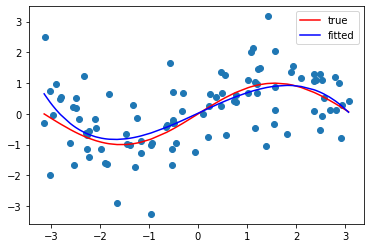

In [8]:
# sort data
plot_data=data_1e2.sort_values("x")
yhat_sort=pd.DataFrame({'x':data_1e2['x'], 'yhat': yhat}).sort_values("x")['yhat']
# plot against data and true CEF
import matplotlib.pyplot as plt
plt.scatter(data_1e2['x'],y)
plt.plot(plot_data['x'],np.sin(plot_data['x']),label="true",color='red')
plt.plot(plot_data['x'],yhat_sort,label="fitted",color='blue')
plt.legend()
plt.show()

### Sample of size 1000

In [9]:
np.random.seed(1)
# simulate sample of size n = 1000
data_1e3 = sim_data(n = 1000)

In [10]:
X=poly(data_1e3['x'].values,10)
y=data_1e3['y'].values

In [11]:
# Standardize data
scaler = StandardScaler()
standarized_x=scaler.fit(X).transform(X)
# Fit Lasso CV
reg = LassoCV(alphas=np.arange(0.001,0.01,0.001), max_iter=100000).fit(standarized_x, y)
# predicted values
yhat=reg.predict(scaler.fit(X).transform(X))

In [12]:
# see the alpha chosen
reg.alpha_

0.002

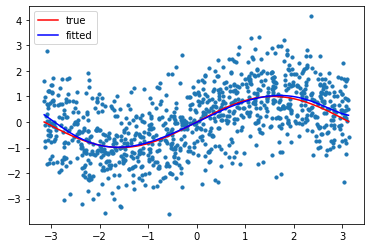

In [13]:
# sort data
plot_data=data_1e3.sort_values("x")
yhat_sort=pd.DataFrame({'x':data_1e3['x'], 'yhat': yhat}).sort_values("x")['yhat']
# plot against data and true CEF
import matplotlib.pyplot as plt
plt.scatter(data_1e3['x'],y,s=10)
plt.plot(plot_data['x'],np.sin(plot_data['x']),label="true",color='red')
plt.plot(plot_data['x'],yhat_sort,label="fitted",color='blue')
plt.legend()
plt.show()

### Sample of size 10000

In [14]:
np.random.seed(1)
# simulate sample of size n = 10000
data_1e4 = sim_data(n = 10000)

In [15]:
X=poly(data_1e4['x'].values,10)
y=data_1e4['y'].values

In [16]:
# Standardize data
scaler = StandardScaler()
standarized_x=scaler.fit(X).transform(X)
# Fit Lasso CV
reg = LassoCV(cv=5,alphas=np.arange(0.001,0.01,0.001),max_iter=100000).fit(standarized_x, y)
# predicted values
yhat=reg.predict(scaler.fit(X).transform(X))

In [17]:
# see the alpha chosen
reg.alpha_

0.001

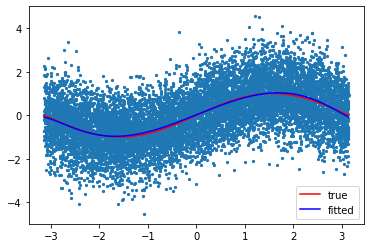

In [18]:
# sort data
plot_data=data_1e4.sort_values("x")
yhat_sort=pd.DataFrame({'x':data_1e4['x'], 'yhat': yhat}).sort_values("x")['yhat']
# plot against data and true CEF
import matplotlib.pyplot as plt
plt.scatter(data_1e4['x'],y,s=5)
plt.plot(plot_data['x'],np.sin(plot_data['x']),label="true",color='red')
plt.plot(plot_data['x'],yhat_sort,label="fitted",color='blue')
plt.legend()
plt.show()